In [79]:
# Abdul Saboor
# 20L-1113
# BDS-4A

# using different techniques for hierarchichal clustering

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.vq import whiten
from scipy.cluster.hierarchy import dendrogram

(1113, 2)
(1113,)
[3 2 1 ... 5 3 1]


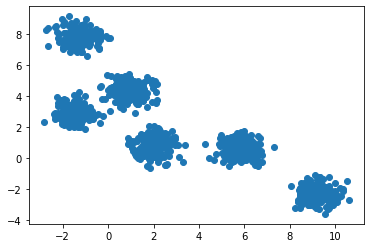

In [81]:
# create Blob with 1113 total labels and 1+1+1+3 = 6 dimensions
# using make_blob function
# help(make_blobs)
x,y = make_blobs(n_samples=1113, n_features=2, centers=6, random_state=0, cluster_std=0.5, shuffle = True)

print(x.shape)
print (y.shape)
print(y)
X = StandardScaler().fit_transform(x)
plt.scatter(x[:,0],x[:,1])

In [82]:
# convering to a data frame and scaling
data=pd.DataFrame(x,y)
data.columns=['x_scaled','y_scaled']

data.iloc[:,0]=(data.iloc[:,0]-min(data.iloc[:,0]))/(max(data.iloc[:,0])-min(data.iloc[:,0]))
data.iloc[:,1]=(data.iloc[:,1]-min(data.iloc[:,1]))/(max(data.iloc[:,1])-min(data.iloc[:,1]))
data.head()

,x_scaled,y_scaled
3,0.104968,0.896105
2,0.136704,0.486254
1,0.376885,0.376832
5,0.616958,0.281779
0,0.299698,0.632698


In [83]:
# ward method
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='ward', metric='euclidean')
for i in distance_matrix:
    print(i)

[1.6200000e+02 9.8800000e+02 1.5949423e-04 2.0000000e+00]
[6.83000000e+02 8.18000000e+02 1.83777955e-04 2.00000000e+00]
[2.16000000e+02 9.67000000e+02 2.04886363e-04 2.00000000e+00]
[1.65000000e+02 9.42000000e+02 3.83835695e-04 2.00000000e+00]
[4.59000000e+02 6.13000000e+02 4.02816437e-04 2.00000000e+00]
[3.59000000e+02 1.04600000e+03 4.07077553e-04 2.00000000e+00]
[9.04000000e+02 9.86000000e+02 4.78478186e-04 2.00000000e+00]
[1.79000000e+02 5.28000000e+02 5.07742759e-04 2.00000000e+00]
[5.95000000e+02 1.09500000e+03 5.40271256e-04 2.00000000e+00]
[7.70000000e+02 8.58000000e+02 5.84614843e-04 2.00000000e+00]
[5.7000000e+01 5.9000000e+02 6.0673034e-04 2.0000000e+00]
[1.80000000e+01 1.38000000e+02 6.10986886e-04 2.00000000e+00]
[5.40000000e+02 1.06500000e+03 6.26239729e-04 2.00000000e+00]
[3.39000000e+02 9.18000000e+02 6.87862113e-04 2.00000000e+00]
[8.56000000e+02 1.08500000e+03 6.92068823e-04 2.00000000e+00]
[1.82000000e+02 3.65000000e+02 7.71625994e-04 2.00000000e+00]
[4.43000000e+02 

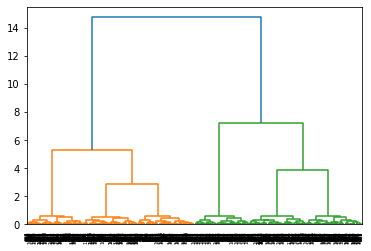

In [84]:
# creating dendrogram
dn=dendrogram(distance_matrix)

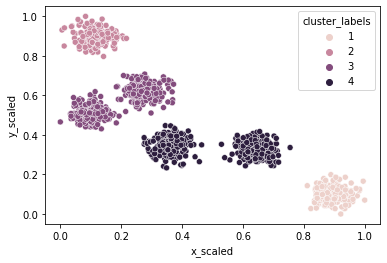

In [85]:
# visualizing with single
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='single', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 4, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);

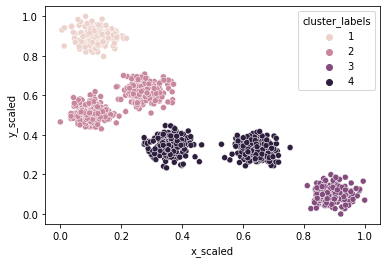

In [86]:
# visualizing with average
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='average', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 4, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);

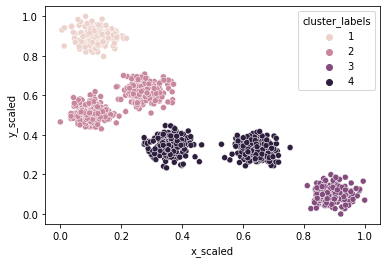

In [87]:
# visualizing with complete
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='complete', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 4, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);


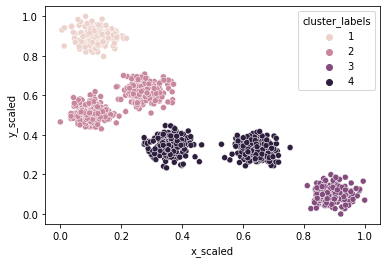

In [88]:
# visualizing with ward
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='ward', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 4, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);

changing std to 0.2

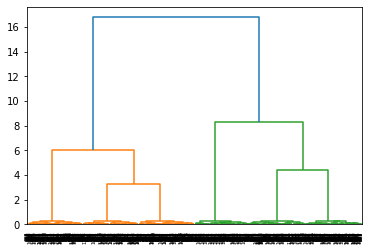

In [89]:
# making blob
x,y = make_blobs(n_samples=1113, n_features=2, centers=6, random_state=0, cluster_std=0.2, shuffle = True)

# convering to a data frame and scaling
data=pd.DataFrame(x,y)
data.columns=['x_scaled','y_scaled']
data.iloc[:,0]=(data.iloc[:,0]-min(data.iloc[:,0]))/(max(data.iloc[:,0])-min(data.iloc[:,0]))
data.iloc[:,1]=(data.iloc[:,1]-min(data.iloc[:,1]))/(max(data.iloc[:,1])-min(data.iloc[:,1]))

distance_matrix = linkage(data[['x_scaled','y_scaled']], method='ward', metric='euclidean')
dn=dendrogram(distance_matrix);

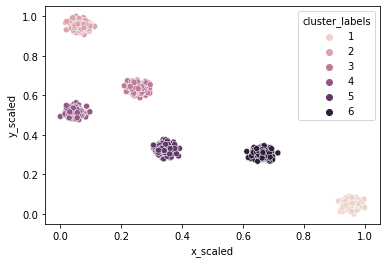

In [90]:
# visualizing with single
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='single', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 6, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);

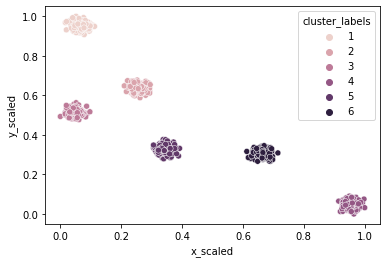

In [91]:
# visualizing with average
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='average', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 6, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);

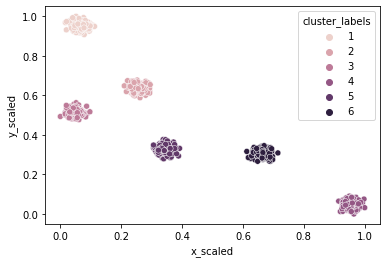

In [92]:
# visualizing with complete
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='complete', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 6, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);


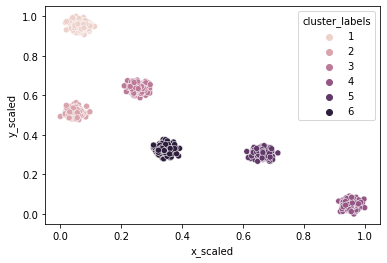

In [93]:
# visualizing with ward
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='ward', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 6, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);

changing std to 0.8

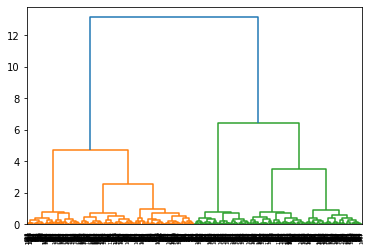

In [94]:
# making blob
x,y = make_blobs(n_samples=1113, n_features=2, centers=6, random_state=0, cluster_std=0.8, shuffle = True)

# convering to a data frame and scaling
data=pd.DataFrame(x,y)
data.columns=['x_scaled','y_scaled']
data.iloc[:,0]=(data.iloc[:,0]-min(data.iloc[:,0]))/(max(data.iloc[:,0])-min(data.iloc[:,0]))
data.iloc[:,1]=(data.iloc[:,1]-min(data.iloc[:,1]))/(max(data.iloc[:,1])-min(data.iloc[:,1]))

distance_matrix = linkage(data[['x_scaled','y_scaled']], method='ward', metric='euclidean')
dn=dendrogram(distance_matrix);

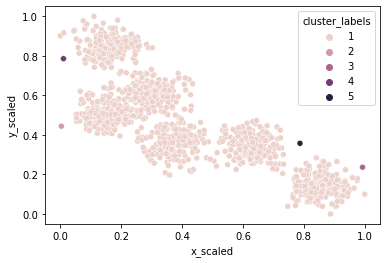

In [95]:
# visualizing with single
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='single', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 5, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);

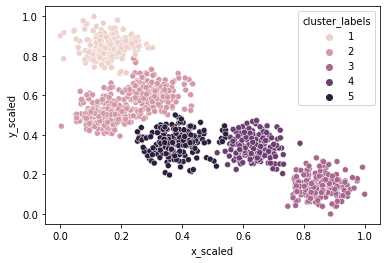

In [96]:
# visualizing with average
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='average', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 5, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);

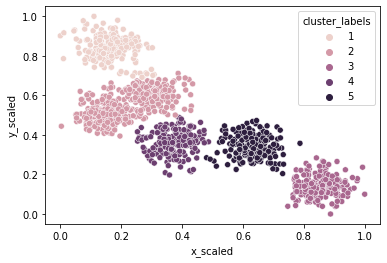

In [97]:
# visualizing with complete
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='complete', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 5, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);


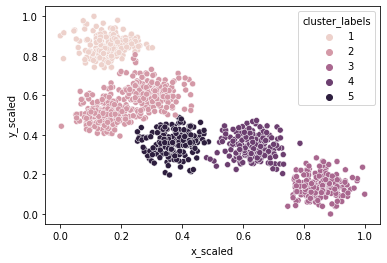

In [98]:
# visualizing with ward
distance_matrix = linkage(data[['x_scaled','y_scaled']], method='ward', metric='euclidean')
data['cluster_labels'] = fcluster(distance_matrix, 5, criterion='maxclust')
sns.scatterplot(x='x_scaled', y='y_scaled', hue='cluster_labels', data=data);